 <h4>Author: Mr. Chandramohan Reddy ANKIREDDYPALLI &nbsp;&nbsp; &nbsp; &nbsp;Email: chandramohanreddyab@gmail.com &nbsp;&nbsp; &nbsp; &nbsp; Contact: +33 766 785 789</h4>   

## Exploratory Data Analysis, and KPI for Design Next Marketing Campaign using current marketing campaign data

### Business Understanding:

**Marketing strategy is a long-term, forward-looking approach and an overall game plan of any organization or any business with the fundamental goal of achieving a sustainable competitive advantage by understanding the needs and wants of customers.** <br>

**Marketing Analytics helps businesses to understand how marketing campaigns are performing as part of Marketing strategies. Marketing analytics play a vital role to understand** <br>
- **Campaign Goals & KPIs for the respective campaign**
- **Budget,and ROI**
- **Campaign Content-Format such gifs, videos, or just images**
- **Channels to promote campaigns**


**In this case, we need to extract key insights to help the next marketing strategy with help of campaign and student data**

### Data Description: 
**Data is stored in Postgres DB and is extracted using SQL server engine in python**

**public.campaign** Contains campaign details of registered student  

>**`student_id` character(64)** : Students ID, unique for each student  
>**`source` character(200)** : Source of website traffic  
>**`campaign` character(200)** : Marketing Campaign details 

**public.students:** Contains Students and language classes information  

>**`id` character(64)** Students ID, unique for each student  
>**`country` character(3)** Stundent origin/located country  
>**`id` character(64)** Student ID, unique for each student   
>**`section` character(50)** Language section   
>**`classes_booked` numeric(10,2)** number of classes booked    
>**`classes_attended` numeric(10,2)** number of classes attended   
 

### Table of Contents:
> **[Importing necessary libraries](#id1)**  
> **[User Defined Functions](#id2)**  
> **[Query data from Postgres DB](#id3)**   
> **[Q1:Explorative Data Analysis:](#id4)**  
> **[Hypotheses](#id5)**  
> **[Q2: Conceptual Questions](#id6)**

### Importing necessary Libraries
<div id="id1"></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### User Defined Functions
<div id="id2"></div>

In [2]:
#UDF for inspecting data
def inspect_data(data):
    print('Data Shape: ',data.shape)
    return pd.DataFrame({"Data Type":data.dtypes,"No. of Unique vlaues":data.apply(lambda x: x.nunique(),axis=0),
                         "Unique Values":data.apply(lambda x: str(x.unique()),axis=0),
                         "NaN Values": data.apply(lambda x: x.isna().sum())})

### Query data from Postgres DB
<div id="id3"></div>

In [3]:
#Creating SQL engine that helps us to query data from Postgress
conn = psycopg2.connect("host=public.bi.lingoda.com dbname=postgres port=5432 user=test password=TPQwk3wwrT3eqvavFJx9REEaqJrVzmGyQBVcGQbSUzGv7ASTGJFDffXY362eSsqP")

In [4]:
# query of all data from the "campaign", and "students" tables in the "Postgres" database, and create pandas data frames
campaign=pd.read_sql_query('SELECT * FROM campaign',con=conn)
students=pd.read_sql_query('SELECT * FROM students',con=conn)

In [5]:
#display campaign data
campaign.head(5)

,student_id,source,campaign
0,fBmhZeyHHqcLFJxlh85r7Ktci29Pr2a9,stronglang.wordpress.com,i_love_languages
1,fBmhZeyHHqcLFJxlh85r7Ktci29Pr2a9,www.lablue.de,i_love_languages
2,fBmhZeyHHqcLFJxlh85r7Ktci29Pr2a9,email,big_savings
3,IMos7Ypty1OdWxQrfgLDk020Yaw35PrV,www.hkage.org.hk,big_savings
4,IMos7Ypty1OdWxQrfgLDk020Yaw35PrV,direct,big_savings


In [6]:
#display students data
students.head(5)

,id,country,section,classes_booked,classes_attended
0,fBmhZeyHHqcLFJxlh85r7Ktci29Pr2a9,CH,spanish,55.0,2.0
1,IMos7Ypty1OdWxQrfgLDk020Yaw35PrV,DE,spanish,50.0,10.0
2,L7Pjm8km0K9MJ59fxVUFkORcLbp69CKB,DE,spanish,70.0,5.0
3,EZ31TFAz9981JtlEli8LtYNdZy8W46uc,US,spanish,32.0,20.0
4,KXaSHopoCCVXit7CUulMWaqLy4ClSfWJ,DE,english,20.0,15.0


### Q1:Exploratory Data Analysis:
<div id="id4"></div>  

### Table1: public.campaign

**Inspect campaign data**

In [7]:
inspect_data(campaign)

Data Shape:  (29, 3)


,Data Type,No. of Unique vlaues,Unique Values,NaN Values
student_id,object,20,['fBmhZeyHHqcLFJxlh85r7Ktci29Pr2a9' 'IMos7Ypty...,0
source,object,17,['stronglang.wordpress.com' 'www.lablue.de' 'e...,0
campaign,object,3,['i_love_languages' 'big_savings' 'i_love_lang...,0


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. There are 29 datapoints (rows), and 20 student Id's,and therefore students are repeated 
<br> 2. Number of Unique Values Souce inforamtion is alomost equal to number of data points, and Data transforamtion is required on this feature 
<br> 3. It seem there are speeling mistakes in `campaign` feature
<br> 3. There are no NaN/NA values to be filled  </font>

**Data Transformation on "source" feature**

In [8]:
#checking source informations to group different catergories
campaign.groupby('source').count()

,student_id,campaign
source,,
akvalink.bitrix24.ru,1,1
ascdedge.ascd.org,1,1
direct,11,11
email,3,3
forum.redcountyrp.com,1,1
greenhouse.my.salesforce.com,1,1
hdvidzpro.me,1,1
im.ibope.com.br,1,1
oleg-leusenko.livejournal.com,1,1


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. 11 times students visited lingoda website directly, 3 times via email, and rest of the times via other websites.
<br> 2. We can bin all these websites as `other_websites` for better understanding
</font>

In [9]:
# Data Transformation 
campaign['web_traffic_source']=campaign['source'].apply(lambda x: x if x in ['direct','email'] else 'other_websites')

**Data Transformation on "campaign" feature**

In [10]:
#checking different campaigns
campaign.groupby('campaign').count()

,student_id,source,web_traffic_source
campaign,,,
big_savings,8,8,8
i_love_language,1,1,1
i_love_languages,20,20,20


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. There is only one row for campaign `i_love_language`, and 20 rowns for `i_love_languages`. It indiacates that there is typo, and has to be changed
</font>

In [11]:
#Data transfomation
campaign['campaign'].replace('i_love_language','i_love_languages',inplace=True)

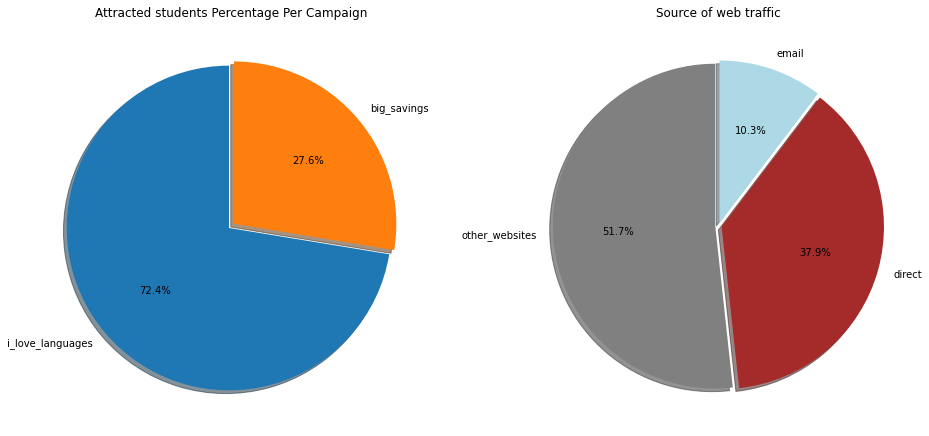

In [12]:
#Pie Chart Visulization to understand effectiveness of each campaign, and sources of webtraffic
fig,axs=plt.subplots(1,2,figsize=(16,10))

campaign['campaign'].value_counts().plot.pie(explode=[0.02, 0.02], autopct='%1.1f%%', shadow=True, startangle=90, ax=axs[0])
axs[0].set_title('Attracted students Percentage Per Campaign',size=12)
axs[0].set_ylabel('')

campaign['web_traffic_source'].value_counts().plot.pie(explode=[0.02, 0.02,0.02], autopct='%1.1f%%', shadow=True,colors=('grey','brown','lightblue'), ax=axs[1],startangle=90)
axs[1].set_title('Source of web traffic',size=12)
axs[1].set_ylabel('')
plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 
1. **i_love_languages** campaign is succesful, where **42%** more students registered compared to **big_savings** campaign <br>
2. The campaign on external websites dominates other campaigns with 51.7% of web traffic, and whereas campaigns through other channels email, direct website has 10.3% ,37.9% of total web traffic respectively.
</font>

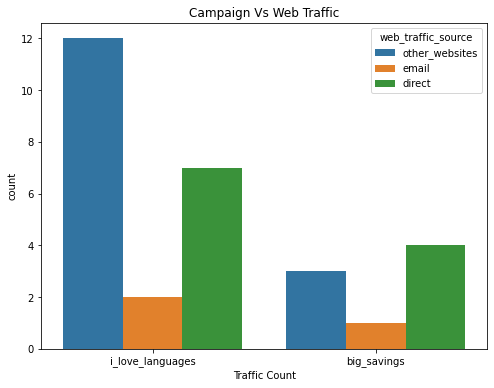

In [13]:
#let breakdown Campaigns Vs Web_Traffic_Sources
plt.figure(figsize=(8,6))
sns.countplot('campaign',hue='web_traffic_source',data=campaign)
plt.title('Campaign Vs Web Traffic',size=12)
plt.xlabel('Campaign',size=10)
plt.xlabel('Traffic Count',size=10)
plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 
1. The campaign **i_love_languages** campaign on external websites, while campaign **big_savings** succeful on direct websites.
2. Campaign through Email has **low student registations** during both campaigns periods
</font>

### Table2: public.students

In [14]:
#inspect student data
inspect_data(students)

Data Shape:  (20, 5)


,Data Type,No. of Unique vlaues,Unique Values,NaN Values
id,object,20,['fBmhZeyHHqcLFJxlh85r7Ktci29Pr2a9' 'IMos7Ypty...,0
country,object,11,['CH' 'DE' 'US' 'SK' 'RU' 'FI' 'FR' 'SP' 'PL' ...,0
section,object,4,['spanish' 'english' 'german' 'french'],0
classes_booked,float64,16,[55.0 50.0 70.0 32.0 20.0 40.0 28.0 10.0 65.0 ...,0
classes_attended,float64,13,[2.0 10.0 5.0 20.0 15.0 8.0 7.0 1.0 12.0 4.0 1...,0


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. There are 20 datapoints (rows), and 20 student Id's,and therefore students id are key's in this table <br> 2. Students from 11 countries are interested to learn 4 languages
<br> 3. There are no NaN/NA values to be filled  </font>

In [15]:
#Let's check if there any students who did not book any classes, or attended any classes
print("Number Students who never booked classes: ",students[students['classes_booked']==0].shape[0])
print("Number Students who did attend any booked classes: ",students[students['classes_attended']==0].shape[0])

Number Students who never booked classes:  0
Number Students who did attend any booked classes:  0


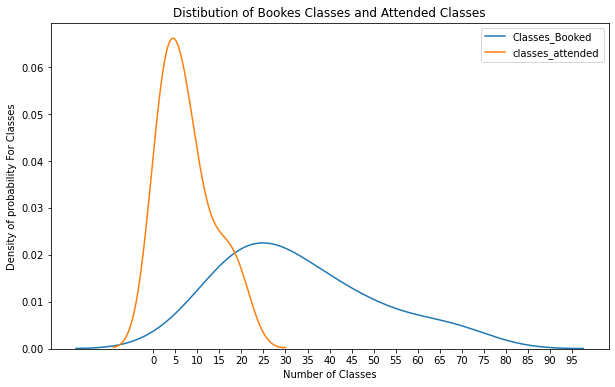

In [16]:
# let's understand classes booked, and classes attended
fig,axs=plt.subplots(1,1,figsize=(10,6))
sns.kdeplot(students.classes_booked,  label='Classes_Booked')
sns.kdeplot(students.classes_attended, label='classes_attended')
plt.title('Distibution of Bookes Classes and Attended Classes',size=12)
plt.xlabel('Number of Classes',size=10)
plt.ylabel('Density of probability For Classes',size=10)
plt.xticks(range(0,100,5))
plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 
1. The distribution shows there there is very less probabilty of students attending all registered classes <br> 
2. On average stundets booked 32 classes, and attended 7 classes <br>
</font>

Note: Distribution plots are just to understand the likelihood of classes booked and attended. Negative values for these variables won't be there.

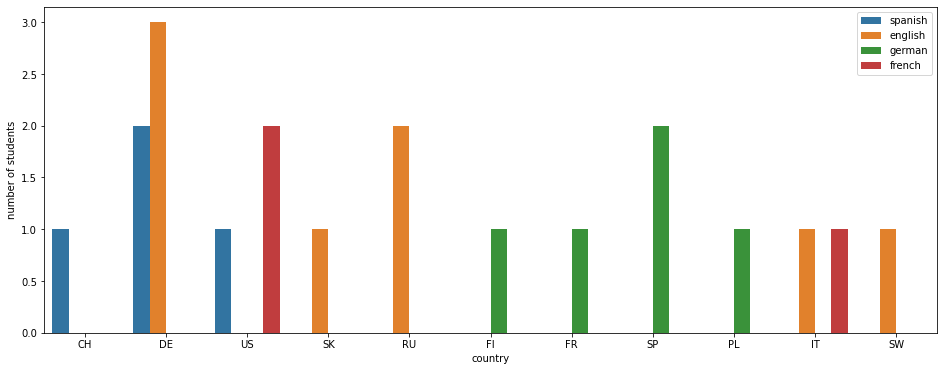

In [17]:
#Country Vs Language 
fig,axs=plt.subplots(1,1,figsize=(16,6))
sns.countplot('country',hue='section',data=students)
plt.ylabel('number of students')
plt.legend()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 
1. People from the neighber countries of germany are more interested to learn German<br> 
2. Highest registrations to learn English, especially from coutnries germany and russia<br>
</font>

### 5 Hypotheses:
<div id="id5"></div>  

<font color=darkblue> 
Given data on campaigns, and students are very less to draw conclusions. Defining statistical hypotheses based on limited pieces of evidence or prior knowledge would help marketing researchers to design campaigns, run experiments, and to discover performance campaigns. <br>

Following are potential hypotheses this case<br>

1. Campaign on other websites is effective<br> 
2. Direct website campaign has high click-rate <br>
3. Email campaign has more registrations <br>
4. Improving content quality improves students attendance  <br>

</font>

### Q2. Concptual Questions
<div id="id6"></div>  

### Q2A: Model that predicts which students would be most likely to be a High Active and High Value student

**Data to be used as input:**

- `student_id:` timestamp of the impression
- `CategoraicalVariables`:  categorical features that represent profile of the customer such as gender, country, age, profession
- `classes_attended` : number of classes attended
- `avg_online_duration` : average_online_classes_duration
- `assignment_activity` : Assignent_activity
- `subscription_details`: subscription_Details
- `section` : course language details
- `campaign_details` : special offers details
- `reminder_emails` : reminder email details
- `app_notificaton_clickrate` : application notification click rate

**Analytical Process:**
There is no target variable that tells a student is (high active and high value) or not. Hence a target variable has to be defined using a metric to classify each student (`True: hight_value and high_active,  False: Other`). 

**example metrics to define target variable:**
1. `value_and_active_student = (attendance %> threshold %) and (classes_booked > threshold)`
2. `value_and_active_studnet = (noramlize(classes_attended)*noramlize(classes_booked))> threshold`
3. `clustering algorithms` can be used to group student into two groups as (high active and high value) and others and use this to classify new studets coming in.

**Following is the example to create target varaible**

In [18]:
from sklearn.preprocessing import Normalizer
nrm=Normalizer()
nrm.fit(students[['classes_attended','classes_booked']])
students[['classes_attended_std','classes_booked_std']]=pd.DataFrame(nrm.transform(students[['classes_attended','classes_booked']]))
students['target']=(students['classes_attended_std']*students['classes_booked_std'])>0.40
students.head(8)

,id,country,section,classes_booked,classes_attended,classes_attended_std,classes_booked_std,target
0,fBmhZeyHHqcLFJxlh85r7Ktci29Pr2a9,CH,spanish,55.0,2.0,0.036340,0.999339,False
1,IMos7Ypty1OdWxQrfgLDk020Yaw35PrV,DE,spanish,50.0,10.0,0.196116,0.980581,False
2,L7Pjm8km0K9MJ59fxVUFkORcLbp69CKB,DE,spanish,70.0,5.0,0.071247,0.997459,False
3,EZ31TFAz9981JtlEli8LtYNdZy8W46uc,US,spanish,32.0,20.0,0.529999,0.847998,True
4,KXaSHopoCCVXit7CUulMWaqLy4ClSfWJ,DE,english,20.0,15.0,0.600000,0.800000,True
5,F6XiNarRyRguxt94ygHr8ohcwkioEgBZ,DE,english,40.0,8.0,0.196116,0.980581,False
6,J1sYm7BfkyIWcls170RxkB14lrfltpip,SK,english,28.0,7.0,0.242536,0.970143,False
7,ehYVY0bXJ03VirWYdpkTyX9OnNzv31aL,RU,english,10.0,8.0,0.624695,0.780869,True


with help of the above data, and Machine Learning/ Deep Learning algorithms, the Classification model is trained to classify new students 

**Analytical Output:** 
1. If a student is classified as not (value_and_active_student), personalized/target marketing can be done to increase student activity, and value. 
2. The output of these algorithms works basis for other marketing strategies.

**Potential delivery mechanism:** Agile or Kanban Methodology , and Intergration with inhouse Marketing tool with visulization

**Python Libraries you use and why**
- `psycopg2`      : to read data from Postgres DB
- `numpy`         : matrix operations
- `sklearn`       : machine learning
- `tensorflow`    : deep learning
- `pandas`        : data handling
- `plotly/seaborn`: interactive visulizations
- `matlplotlib`   : base package for visulizations
- `dash/flask`    : Web Development framework the Html,Javascript,Boostrap

Note: While working on a problem, the solution may require some other libraries which are not listed  above, but these are the most commonly used libraries for ML development.

### Q2B. Campaign optimization algorithm:

**`Cross-channel marketing spend optimization using deep learning`** is a recent trend in marketing, I would recommend implementing the same strategy for this campaign optimization<br>

**Data to be used as input:**
- `Timestamp:` timestamp of the impression
- `UID:` unique user identifier using cookies
- `Campaign:` unique campaign identifier using cookies
- `Click:` 1 if the impression was clicked; 0 otherwise
- `Cost:` the price paid for this ad
- `CategoraicalVariable`: categorical features associated with the ad such original of country, type of ad etc
- `ConversionVariables`: if click happened from the same user in last 30days, conversation ids etc

**Analytical process:** Even though there are several approaches to optimize a campaign, one of the effective optimization algorithms is **attribution modeling**  

- Analyze individual customer journeys and interactions, budget is assigned to channels or activities for each conversion.
- Allocation of budget can be made based on the attribution scores averaged across multiple customer journeys.
- Attributions are calculated by using machine learning and deep learning algorithms

one of the traditional approaches is **marketing mix modeling (MMM).**  A basic model of this kind may look like this

**`Sales = alpha1×budget1 + alpha2×budget2 + alpha3xbudget3 +....`**

Here α1,α2,α3.. are different channels attirubutions of medium calcualted by using regression

**Analytical Output:**   Idea is to have an optimization algorithm to do **budget optimization across channels(websites, email), across campaigns(type of content, discounts), optimization of channel parameters.** Attribution model meets this criterion and  help to achieve

- Optimized attribution values: Performance of campaigns on different channels
- Varied Budget allocations: Decrease/Increase budgets for different marketing strategies
- High ROI

**Potential delivery mechanism:** Agile Methodology, and Integration with inhouse Marketing tool with visualization

**Python Libraries you use and why**
- `psycopg2`      : to read data from Postgres DB
- `numpy`         : matrix operations
- `sklearn`       : machine learning
- `tensorflow`    : deep learning
- `pandas`        : data handling
- `plotly/seaborn`: interactive visulizations
- `matlplotlib`   : base package for visulizations
- `dash/flask`    : Web Development framework the Html,Javascript,Boostrap

Note: While working on a problem, the solution may require some other libraries which are not listed  above, but these are the most commonly used libraries for ML development